In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_train, X_valid = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]
X_test = X_test / 255.0

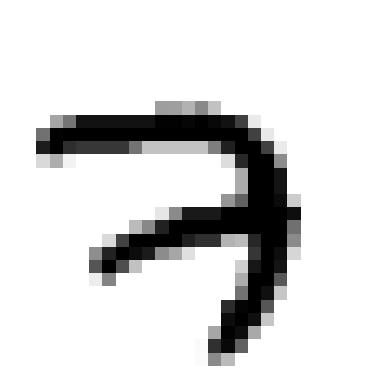

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [8]:
y_train[0]

7

In [9]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.losses = []
        self.rates = []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [10]:
import numpy as np

tf.keras.backend.clear_session()

tf.random.set_seed(42)
np.random.seed(42)

In [11]:
im_shape = list(X_train[0].shape)
m1 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=im_shape),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

m1.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

exp_lr = ExponentialLearningRate(1.005)

2024-07-28 20:04:23.136841: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-28 20:04:23.136863: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-28 20:04:23.136868: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-28 20:04:23.136899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-28 20:04:23.136916: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
h0 = m1.fit(
    X_train,
    y_train,
    epochs=3,
    validation_data=(X_valid, y_valid),
    callbacks=[exp_lr],
    verbose=1,
)

Epoch 1/3


2024-07-28 20:04:23.663606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 14s 8ms/step - loss: 1832353664.0000 - accuracy: 0.7257 - val_loss: 90737147904.0000 - val_accuracy: 0.6022
Epoch 2/3
1719/1719 [==============================] - 13s 8ms/step - loss: 432215698710187737088.0000 - accuracy: 0.7156 - val_loss: 13618608301791296618496.0000 - val_accuracy: 0.6772
Epoch 3/3
1719/1719 [==============================] - 13s 7ms/step - loss: 334371616733545058300827009024.0000 - accuracy: 0.7243 - val_loss: 5855923031186219947134294163456.0000 - val_accuracy: 0.6980


Text(0, 0.5, 'Loss')

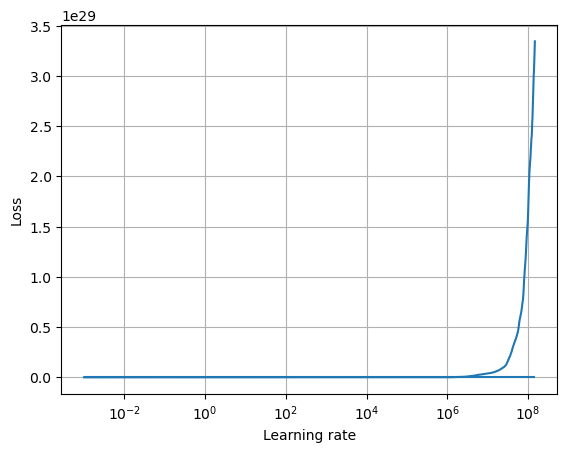

In [13]:
plt.plot(exp_lr.rates, exp_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(exp_lr.losses), min(exp_lr.rates), max(exp_lr.rates))
plt.grid()
plt.xlabel('Learning rate')
plt.ylabel('Loss')

In [14]:
from pathlib import Path

run_index = 1
run_logdir = Path() / "my_mnist_logs_july2024" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs_july2024/run_001')

In [15]:
m2 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=im_shape),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [18]:
m2.compile(
    loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=3e-3), metrics=["accuracy"]
)

In [22]:
earlystopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.04, patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model_july2024", save_best_only=True)
tf_cb = tf.keras.callbacks.TensorBoard(run_logdir)

h1 = m2.fit(
    X_train, y_train, epochs=200, validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, earlystopping_cb, tf_cb], verbose=1
)

Epoch 1/200
1713/1719 [============================>.] - ETA: 0s - loss: 34369.4961 - accuracy: 0.8143INFO:tensorflow:Assets written to: my_mnist_model_july2024/assets


INFO:tensorflow:Assets written to: my_mnist_model_july2024/assets


1719/1719 [==============================] - 11s 6ms/step - loss: 34350.4062 - accuracy: 0.8144 - val_loss: 29043.9102 - val_accuracy: 0.8318
Epoch 2/200
1719/1719 [==============================] - 10s 6ms/step - loss: 36585.2422 - accuracy: 0.8132 - val_loss: 44897.7422 - val_accuracy: 0.7708
Epoch 3/200
1719/1719 [==============================] - 10s 6ms/step - loss: 36494.8789 - accuracy: 0.8155 - val_loss: 40757.5117 - val_accuracy: 0.8230
Epoch 4/200
1719/1719 [==============================] - 10s 6ms/step - loss: 37508.7891 - accuracy: 0.8187 - val_loss: 35371.5430 - val_accuracy: 0.8228
Epoch 5/200
1719/1719 [==============================] - 10s 6ms/step - loss: 40354.1914 - accuracy: 0.8130 - val_loss: 36982.3008 - val_accuracy: 0.8136
Epoch 6/200
1719/1719 [==============================] - 10s 6ms/step - loss: 40294.9922 - accuracy: 0.8162 - val_loss: 31213.2793 - val_accuracy: 0.8506
Epoch 7/200
1719/1719 [==============================] - 10s 6ms/step - loss: 42212.0273